# Homogeneous coordinates

In [9]:
import numpy as np
import sys

%matplotlib inline
import matplotlib.pyplot as plt
from spatialmath.base import colvec, e2h, h2e

***
# Homogeneous coordinates
Homogeneous or projective coordinates  are a system of coordinates used in projective geometry, just as Cartesian coordinates are used in Euclidean geometry. They have the advantage that the coordinates of points, including points at infinity, can be represented using finite coordinates. They are widely used in computer graphics, computer vision and robotics.


## Homogeneous points

### Converting Euclidean coordinates to homogeneous coordinates
A Euclidean point $(x,y) \in \mathbb{R}^2$ can be represented in homogeneous coordinates by a 3-vector $(x,y,1) \in \mathbb{P}^2$.  We have increased the dimension of the vector by one and appended a one.  

We will represent points by column vectors (a $2 \times 1$ matrix)

In [10]:
p = colvec([2, 3])
p

array([[2.],
       [3.]])

Note that `colvec` is a convenience function defined in `common.py`.

To make it homogeneous we could use `numpy` commands

In [11]:
ph = np.vstack( (p, 1))
ph

array([[2.],
       [3.],
       [1.]])

but we have defined another convenience function `e2h`

In [12]:
e2h(p)

array([[2.],
       [3.],
       [1.]])

which does the same thing.

We can apply this trick to Euclidean points in any dimension, i.e. a 3D Euclidean point becomes a 4-vector in projective space.

### Converting homogeneous coordinates to Euclidean coordinates
To convert back to Euclidean coordinates we drop the last element of the vector, lower the dimension by one, but we divide through by that last element.

This is trivial in the case we've shown where the last element is equal to one but that is not always the case.

Consider the homogeneous coordinate $\tilde{p} = (4, 8, 2)$ 

<p style="border:3px; border-style:solid; border-color:#FF0000; padding: 1em;">Note that I use the notation $\tilde{p}$ to indicate a homogeneous coordinate, or in code I add the suffix "h".</p>

In [13]:
ph = colvec([4, 8, 2])
p = ph[0:2] / ph[2]
p

array([[2.],
       [4.]])

Once again, there is a convenience function for this called `h2e`

In [14]:
p = h2e(ph)
p

array([[2.],
       [4.]])

A key property of homogeneous coordinates is that the overall scale does not matter, that is $\tilde{p}$ is equivalent to $\lambda \tilde{p}$ so long as $\lambda \ne 0$. Again this is easy to confirm

In [15]:
h2e(10*ph)

array([[2.],
       [4.]])

gives the same answer as above.

<p style="border:3px; border-style:solid; border-color:#FF0000; padding: 1em;">Note that this fails if the last element of the vector is zero. Such a coordinate represents a point at infinity and is referred to as an ideal point. It is ideal, not in the sense it's a perfect point that everybody would want to have, but as in imaginery or unachievable.</p>

## Visualising homgeneous coordinates

For points in the 2D plane we can visualise this dimensional lift as shown in the following animation.  The Euclidean plane is the plane $z=1$ shown in red.  You can adjust the $x$ and $y$ slides to move the Euclidean point on that plane.  The homogeneous coordinate is shown as a 3D vector of length $\lambda$.  You can see that varying the length changes the value of the homgeneous coordinate but not the Euclidean coordinate.

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d

import ipywidgets as widgets


verts = np.array([
    [-5, -5],
    [-5,  5],
    [ 5,  5],
    [ 5, -5] ])

eucl = widgets.Text(layout=widgets.Layout(width='50%'))
display(eucl)
hom = widgets.Text(layout=widgets.Layout(width='50%'))
display(hom)

@widgets.interact
def animate( x = widgets.FloatSlider(value=2, description='x:', min=-4, max=4),
             y = widgets.FloatSlider(value=3, description='y:', min=-4, max=4),
             lam = widgets.FloatSlider(value=1, description='$\lambda$', min=0.2, max=5)):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    p = plt.Polygon(verts, alpha=0.7, color="r")

    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=1, zdir="z")

    ax.set_xlim3d(-5, 5)
    ax.set_ylim3d(-5, 5)
    ax.set_zlim3d(0, 5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.quiver(0, 0, 0, x*lam, y*lam, lam, arrow_length_ratio=0.1)
    ax.scatter3D(x, y, 1, 'ko')
    
    eucl.value = "Euclidean coordinate:   (%f, %f)" % (x, y)
    hom.value = "Homogeneous coordinate: (%f, %f, %f)" % (x*lam, y*lam, lam)

Text(value='', layout=Layout(width='50%'))

Text(value='', layout=Layout(width='50%'))

interactive(children=(FloatSlider(value=2.0, description='x:', max=4.0, min=-4.0), FloatSlider(value=3.0, desc…

## Point equation of a line
Lines in 2D space can also be represented in homogeneous form.

Consider the line $y = x-2$ which we can rearrange as $x-y-2=0$ and then rewrite it in matrix form  as 
\begin{equation}
\begin{pmatrix}1 & -1 & -2\end{pmatrix} \begin{pmatrix} x\\y\\1 \end{pmatrix} = 0
\end{equation}
which we call the point equation of a line.  It's the product of the line in homogeneous form, represented by a row vector
\begin{equation}
\ell = \begin{pmatrix}1 & -1 & -2\end{pmatrix}
\end{equation}
multiplied by a homogeneous point
\begin{equation}
\tilde{p} = \begin{pmatrix}x \\ y \\ 1\end{pmatrix}
\end{equation}
represented by a column vector.

The advantage of representing a line this way, compared to $y=mx+c$, is that it easy to represent a vertical line, for example, $\ell = (1, 0, -2)$ is the vertical line $x=2$.

<p style="border:3px; border-style:solid; border-color:#FF0000; padding: 1em;">Note that for the Euclidean plane points and lines are duals.  This is not the case for 3D Euclidean space.  A homogeneous coordinate where the first two element are zero is referred to as the *ideal* line.</p>

## Join of two points in the Euclidean plane

Consider two points $p_1 = (1,2)$ and $p_2 = (3,3)$

In [17]:
p1 = colvec([1, 2])
p2 = colvec([3, 3])

which we can convert to homogeneous form

In [18]:
p1h = e2h(p1)
p2h = e2h(p2)
print("p1h =\n", p1h)
print("p2h =\n", p2h)

p1h =
 [[1.]
 [2.]
 [1.]]
p2h =
 [[3.]
 [3.]
 [1.]]


A line joining these two points is given by the cross product

In [19]:
l = np.cross(p1h.T, p2h.T).reshape((3,))
print(l)

[-1.  2. -3.]


<p style="border:3px; border-style:solid; border-color:#FF0000; padding: 1em;">Note that the numpy cross method only accepts row vectors.</p>

We can easily validate this by plotting the two points, and the computed line.  Note that the line is given in point equation form $$\begin{pmatrix} \ell_0 & \ell_1 & \ell_2 \end{pmatrix} \begin{pmatrix}x \\ y \\ 1\end{pmatrix} = 0$$ which we can rewrite as $\ell_0 x + \ell_1 y +  \ell_2 = 0$ and then as $y = -\ell_0/\ell_1 x - \ell_2/\ell_1$ to plot in conventional form

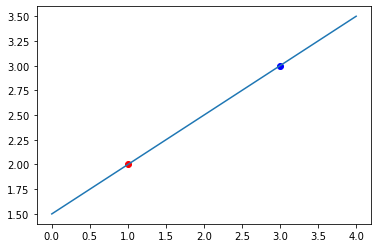

In [20]:
plt.clf()
plt.plot(p1[0], p1[1], 'ro')
plt.plot(p2[0], p2[1], 'bo')
x = np.linspace(0, 4, 100)  # x span for the line segment
y = (-l[0]*x - l[2]) / l[1] # y = f(x)
plt.plot(x, y)

## Intersection of two lines in the Euclidean plane
Now consider two lines: $y = x-2$, and also $y = -2x+6$.
They can be represented in homogeneous form as 3-tuples
\begin{align}
\ell_1 &= \begin{pmatrix}1 & -1 & -2\end{pmatrix} \\
\ell_2 &= \begin{pmatrix}-2 & -1 & 6\end{pmatrix}
\end{align}
In python this is

In [21]:
l1 = np.array([1, -1, -2])
l2 = np.array([-2, -1, 6])

The intersection point of the two lines is the homogeneous point given by the cross product

In [22]:
p = np.cross(l1, l2)
p

array([-8, -2, -3])

[2.66666667 0.66666667]


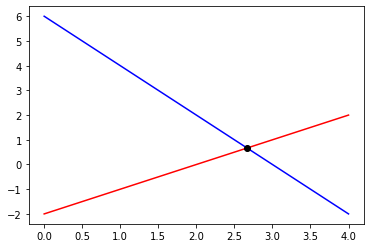

In [23]:
# plot the lines for x=[0,4]
x = np.linspace(0, 4, 100)
plt.plot(x, x-2, 'r')
plt.plot(x, -2*x+6, 'b')

# plot the point, first of all convert from homogeneous to Euclidean
pe = p[0:2] / p[2]
print(pe)
plt.plot(pe[0], pe[1], 'ko')

## Parallel lines
Consider two parallel lines $y=x$ and $y=x+1$ which in homogeneous form are
\begin{align}
\ell_1 &= \begin{pmatrix} 1 & -1 & 0\end{pmatrix} \\
\ell_2 &= \begin{pmatrix} 1 & -1 & 1\end{pmatrix}
\end{align}
then their intersection would be 

In [24]:
l1 = np.array([1, -1, 0])
l2 = np.array([1, -1, 1])
p = np.cross(l1, l2)
p

array([-1, -1,  0])

which we see has its third element equal to zero. This is an ideal point or a point at infinity.  Bottom line, two parallel lines intersect at infinity.  

# Key points
* Any point in the projective plane is represented by a triple (X, Y, Z), called the homogeneous coordinates or projective coordinates of the point, where X, Y and Z are not all 0.
* The point represented by a given set of homogeneous coordinates is unchanged if the coordinates are multiplied by a common factor.
* Conversely, two sets of homogeneous coordinates represent the same point if and only if one is obtained from the other by multiplying all the coordinates by the same non-zero constant.
* When Z is not 0 the point represented is the point (X/Z, Y/Z) in the Euclidean plane.
* When Z is 0 the point represented is a point at infinity and is called the _ideal point_.

The great thing about using homogeneous coordinates is that there is no need for tests about lines being vertical (infinite gradients) or not intersecting.  It all comes out in the wash.